# Import Library

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from IPython.display import clear_output

# Classes and Function

In [50]:
class Point: 
    def __init__(self, id, x, y, partition):
        self.id = id
        self.partition = partition
        self.x = x
        self.y = y 

    def get_pos(self):
        return self.x, self.y

In [51]:
class Graph: 
    def __init__(self, points = {}, weight = np.array([[]])): 
        self.points = points
        self.weight = weight
        self.all_weight = weight

    def get_points(self):
        return self.points        
        
    def get_points_coords(self): 
        points_x = np.array([])
        points_y = np.array([])

        for i in self.points:
            points_x = np.append(points_x, self.points[i].get('x'))
            points_y = np.append(points_y, self.points[i].get('y'))

        return points_x, points_y

    def get_weight(self):
        return self.weight

    def get_spread(self):
        points_x, points_y = self.get_points_coords()
        return max(max(points_x) - min(points_y), max(points_y) - min(points_y))

    def is_connected(self):
        if(self.weight.size == 0): 
            return False
            
        num_vertices = len(self.points)

        def dfs(vertex, visited):
            visited[vertex] = True
            for neighbor in range(num_vertices):
                if self.weight[vertex, neighbor] != 0 and not visited[neighbor]:
                    dfs(neighbor, visited)

        visited = [False] * num_vertices

        dfs(0, visited)

        return all(visited)

    def calculate_weight(self, min_s, max_s):
        iteration = 0
        points_x, points_y = self.get_points_coords()
        size = len(points_x)
        temp = np.zeros([size, size])
        for i in range(size):
            for j in range(size):
                temp[i, j] = np.sqrt(np.abs(points_x[i] - points_x[j]) ** 2 + np.abs(points_y[i] - points_y[j]) ** 2)
        
        self.all_weight = np.copy(temp)
        self.weight = np.zeros([size, size])
        while(not self.is_connected()):
            iteration += 1
            if(min_s != 0 and max_s != 0):
                new_weight = np.zeros([size, size])
                
                for j in range(size):
                    n_edge_rand = np.random.randint(min_s, max_s)
                    idx = np.argpartition(self.all_weight[j, :], n_edge_rand)
                    for k in idx[1:n_edge_rand + 1]:
                        new_weight[j, k] = self.all_weight[j, k]
                    new_weight[:, j] = new_weight[j, :]
                    
            self.weight = np.copy(new_weight)

            if(iteration % 100 == 0):
                if(min_s < max_s - 1):
                    min_s += 1
                else:
                    max_s += 1
                    
        print('Iterations: ', iteration, 'Min Side:', min_s, 'Max Side:', max_s)
        return self.weight

    def update_partition(self, id, partition):
        self.points[id]['partition'] = partition

    def add_point(self, point): 
        self.points[point.id] = {'x': point.x, 'y': point.y, 'partition': point.partition}

    def remove_point(self, id):
        try:
            self.points.pop(id)
        except:
            print('point not in partition')

        


In [52]:
def generate_rand_points(n, interval): 
    graph = Graph()
    temp = np.random.rand(2, n) * interval[0] + interval[1]
    for i in range(n):
        graph.add_point(Point(i, temp[0, i], temp[1, i], 0))
    return graph

# Setup

In [53]:
n_points = 50
n_partition = 8
interval = [-100, 100]

## Generate Graph

In [54]:
graph = generate_rand_points(n_points, interval)
points_x, points_y = graph.get_points_coords()

Iterations:  4 Min Side: 1 Max Side: 4


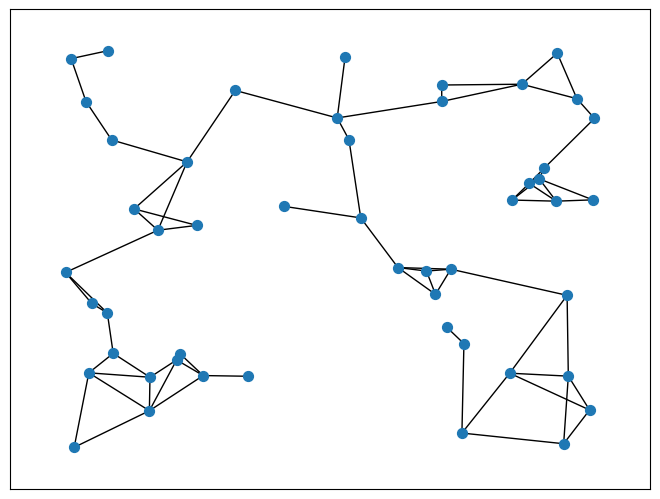

In [55]:
weight = graph.calculate_weight(1, 4)
pos = {i: (graph.get_points()[i].get("x"),  graph.get_points()[i].get("y")) for i in graph.get_points()}

G = nx.Graph(np.array(weight))
nx.draw(G, node_size=50, pos=pos)
plt.axis("on")
plt.show()

In [60]:
points_id = np.linspace(0, n_points, n_points)
curr_partition = 0

partition_size = np.zeros(n_partition)

for i in range(n_partition):
    partition_size[i] = n_points // n_partition

for i in range(n_points - n_points // n_partition * n_partition):
    partition_size[i] += 1
    
while len(points_id) > 0:
    rand = np.random.randint(len(points_id))
    for i in range(partition_size[curr_partition]):
        if(i == 0):
            graph.update_partition(points_id[rand], curr_partition)
            partition_size[curr_partition] -= 1
            points_id = np.delete(rand)
        # else: 
            
            

SyntaxError: invalid syntax (4236261819.py, line 18)

In [61]:
x = np.array([0,0,1,4,0,1,4])
x  =np.delete(x, 1)

In [62]:
x

array([0, 1, 4, 0, 1, 4])